In [ ]:
%%html
<h1 style="color:orange;">INTRO TO BLOCK CHAIN ENGINEERING - PROJECT-8 bitcoinlib - 12613141</h1>

In [ ]:
# install required packages
!apt-get install libgmp-dev
!pip install bitcoinlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgmpxx4ldbl
Suggested packages:
  gmp-doc libgmp10-doc libmpfr-dev
The following NEW packages will be installed:
  libgmp-dev libgmpxx4ldbl
0 upgraded, 2 newly installed, 0 to remove and 38 not upgraded.
Need to get 346 kB of archives.
After this operation, 1,702 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmpxx4ldbl amd64 2:6.2.1+dfsg-3ubuntu1 [9,580 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmp-dev amd64 2:6.2.1+dfsg-3ubuntu1 [337 kB]
Fetched 346 kB in 1s (358 kB/s)
Selecting previously unselected package libgmpxx4ldbl:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libgmpxx4ldbl_2%3a6.2.1+dfsg-3ubuntu1_amd64.deb ...
Unpacking libgmpxx4ldbl:amd64 (2:6.2.1+dfsg-3ubuntu1) ...
Selecting previously unselec

In [ ]:
from pprint import pprint
from bitcoinlib.transactions import *
from bitcoinlib.services.services import Service

# connnect to bitcoin blockchain service provider
srv = Service()

# read genesis block (block# 0)
gb = srv.getblock(0)
pprint(gb.as_dict())

# timestamp: Unix time[a] is a date and time representation widely used
# in computing. It measures time by the number of seconds that have elapsed
# since 00:00:00 UTC on 1 January 1970, the beginning of the Unix epoch,
# less adjustments made due to leap seconds.

{'bits': 486604799,
 'block_hash': '000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f',
 'confirmations': None,
 'difficulty': 1.0,
 'height': 0,
 'merkle_root': '4a5e1e4baab89f3a32518a88c31bc87f618f76673e2cc77ab2127b7afdeda33b',
 'nonce': 2083236893,
 'prev_block': '0000000000000000000000000000000000000000000000000000000000000000',
 'target': '00000000ffff0000000000000000000000000000000000000000000000000000',
 'timestamp': 1231006505,
 'transactions': [<Transaction(id=4a5e1e4baab89f3a32518a88c31bc87f618f76673e2cc77ab2127b7afdeda33b, inputs=1, outputs=1, status=unconfirmed, network=bitcoin)>],
 'tx_count': 1,
 'version': 1}


In [ ]:
# get the genesis block's transaction
txid = '4a5e1e4baab89f3a32518a88c31bc87f618f76673e2cc77ab2127b7afdeda33b'

# get raw (hex) transaction info and print
rt = srv.getrawtransaction(txid)
print("Raw: %s" % rt)

# print it as bytes string
# note the headline of 03/Jan/2009 is included
# A possible motivation to put this headline into the genesis block
# is to prove that no "pre-mining" has happened.
print(bytes.fromhex(rt))
# parse hex tx - this process is called deserialization
t = Transaction.parse_hex(rt)

# create a dictionary of transaction key-value pairs and pprint
pprint(t.as_dict())

Raw: 01000000010000000000000000000000000000000000000000000000000000000000000000ffffffff4d04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73ffffffff0100f2052a01000000434104678afdb0fe5548271967f1a67130b7105cd6a828e03909a67962e0ea1f61deb649f6bc3f4cef38c4f35504e51ec112de5c384df7ba0b8d578a4c702b6bf11d5fac00000000
b"\x01\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xffM\x04\xff\xff\x00\x1d\x01\x04EThe Times 03/Jan/2009 Chancellor on brink of second bailout for banks\xff\xff\xff\xff\x01\x00\xf2\x05*\x01\x00\x00\x00CA\x04g\x8a\xfd\xb0\xfeUH'\x19g\xf1\xa6q0\xb7\x10\\\xd6\xa8(\xe09\t\xa6yb\xe0\xea\x1fa\xde\xb6I\xf6\xbc?L\xef8\xc4\xf3U\x04\xe5\x1e\xc1\x12\xde\\8M\xf7\xba\x0b\x8dW\x8aLp+k\xf1\x1d_\xac\x00\x00\x00\x00"
{'block_hash': None,
 'block_height': None,
 'coinbase': True,
 'conf

#Bitcoin‘s genesis block:

1. mined at 2009-01-03 18:15:05
2. references a previous block with hash 0
3. contains only the mining reward transaction -> first 50 BTC which can never be spent

The fact that it cannot be spent is based on the source code of the current bitcoin-core client. The client searches through all blocks in ConnectBlock and processes all transactions but skips the genesis block.

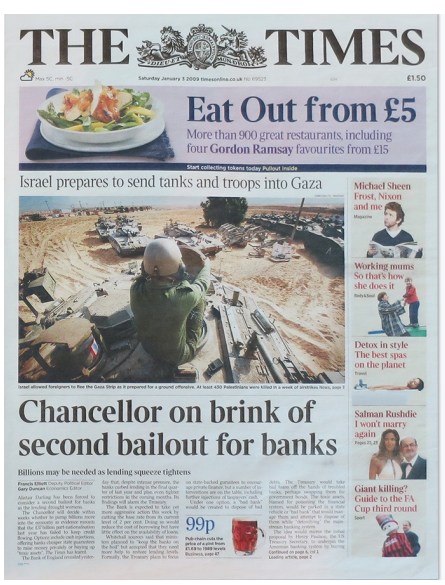

In [ ]:
# get block #400000 and pretty print it
b = srv.getblock(400000)
pprint(b.as_dict())

{'bits': 403093919,
 'block_hash': '000000000000000004ec466ce4732fe6f1ed1cddc2ed4b328fff5224276e3f6f',
 'confirmations': None,
 'difficulty': 163491654908.95926,
 'height': 400000,
 'merkle_root': 'b0e8f88d4fb7cbc49ab49a3a43c368550e22a8e9e3e04b15e34240306a53aeec',
 'nonce': 657220870,
 'prev_block': '0000000000000000030034b661aed920a9bdf6bbfa6d2e7a021f78481882fa39',
 'target': '000000000000000006b99f000000000000000000000000000000000000000000',
 'timestamp': 1456417484,
 'transactions': [<Transaction(id=a8d0c0184dde994a09ec054286f1ce581bebf46446a512166eae7628734ea0a5, inputs=1, outputs=1, status=confirmed, network=bitcoin)>,
                  <Transaction(id=0de586d0c74780605c36c0f51dcd850d1772f41a92c549e3aa36f9e78e905284, inputs=1, outputs=1, status=confirmed, network=bitcoin)>,
                  <Transaction(id=fc12dfcb4723715a456c6984e298e00c479706067da81be969e8085544b0ba08, inputs=3, outputs=2, status=confirmed, network=bitcoin)>,
                  <Transaction(id=928c4275dfd6270349

In [ ]:
# get the next block and pretty print it
b2 = srv.getblock(400001)
pprint(b2.as_dict())

{'bits': 403093919,
 'block_hash': '000000000000000005421b1b2ee6d06d037557d7f5ec96852542413cfed40c22',
 'confirmations': 433968,
 'difficulty': 163491654908.95926,
 'height': 400001,
 'merkle_root': '3094a47e63d5ee29d3caff6886cc44969b17962132cef65f2a3643024738a545',
 'nonce': 479567485,
 'prev_block': '000000000000000004ec466ce4732fe6f1ed1cddc2ed4b328fff5224276e3f6f',
 'target': '000000000000000006b99f000000000000000000000000000000000000000000',
 'timestamp': 1456419515,
 'transactions': [<Transaction(id=20f69c02c032ffa6ba30d9a0b9321947795ec2ac361196448f9c5df83971178f, inputs=1, outputs=1, status=confirmed, network=bitcoin)>,
                  <Transaction(id=7e7f1d33c16a3f20cc951929885b12c49af6422ab526ea036df04fe5a9a1d89b, inputs=331, outputs=1, status=confirmed, network=bitcoin)>,
                  <Transaction(id=0a8dc256faa3609324a2dd12e9559fd4de4f88319e5915bacdd482270939d66d, inputs=358, outputs=1, status=confirmed, network=bitcoin)>,
                  <Transaction(id=c2fe9568c353

In [ ]:
# Deserialize and verify a transaction in block #400001
txid = '7950350f3615c1e5f9b377ce265cba4e76fb217672f5f658aa77c3803c53168e'

# get raw (hex) transaction info and print
rt = srv.getrawtransaction(txid)
print("Raw: %s" % rt)

# parse hex tx - this process is called deserialization
t = Transaction.parse_hex(rt)

# create a dictionary of transaction key-value pairs and pprint
pprint(t.as_dict())

# verify Tx
print("Verified: %s" % t.verify())

Raw: 010000000502f66b4525ac6eec3d765d3dffa344a237f4242dd0ae5223d812d749b549861a000000008a47304402205ed02297d029bf7d49d1fa48e44e144f41a139e1c91dbb35e0bfea360b002d2502207c37b9b34f652dc95a7bd481a9468fa733da676d031e0a47c24a4486eececaa60141040067d544faa3de80121512dbe15efcc5b5cedbaa750769e02bb14f3122982e35e90521a6710ec64223a4119c76d3fc88b89bf347bc86b6cc062908874f43680ffeffffff6195a532c97067a9b62b63887367ebcb83f312dc15f683e630761cc3e572b7b3000000008b4830450221008bef07a03a890ac432c71118e4f0e02534d0169c974cd2d2161daec8460216d10220796ac06eb461ec1ae2f68e5774abfd48c7dccd542f161abea199dae16c1c97a9014104bff9135aaf593d402bcea2a8e2935ed2ae0ab7b3aa7174d50886656e62523f01b88a8175e914bfc0b0e6e4bad3a03563db735d589ab496ee60438f60d7fc635ffeffffffd8c6a9ffc947e7620a01d0a0ac6e6e761a55b505f502f4a83fc4520938fa45950e0000008a473044022065236a71abf3bc364b1d53b49584534866ac9d2c96bc207b7429f6704f750801022042511187c0bf3aad7879e2f6d92917dab45307d6ef60fcadc3a629d05e3cc74c014104de296b6c6db48cb6c204c59915143c134ef4e0684e578

In [ ]:
# find wallet's balance in satoshies
address = '1BvBMSEYstWetqTFn5Au4m4GFg7xJaNVN2'
balance = srv.getbalance(address)
print(balance, "satoshies")

30879180 satoshies


In [ ]:
# 1BTC = 10^8 satoshies
balance_btc = balance / 100000000
print(balance_btc, "BTC")

0.3087918 BTC


# Reading block 780698

Create a code cell and write a code to read block 780698 and pprint it as a dictionary


---



In [ ]:
# get the next block and pretty print it
block = srv.getblock(780698)
pprint(block.as_dict())


{'bits': 386299521,
 'block_hash': '000000000000000000045cdecebee2a7fb0b219ba0260b0d8d87bccc4d42469e',
 'confirmations': None,
 'difficulty': 43551722213590.37,
 'height': 780698,
 'merkle_root': '564488c8f73996524b20c33a34fb98c3ce30990d97e5b63319ae609394b81048',
 'nonce': 2591039077,
 'prev_block': '0000000000000000000532dbbb6dbd2b7b5ab32227a9d3a09d6c567cf6a41d7e',
 'target': '0000000000000000000676810000000000000000000000000000000000000000',
 'timestamp': 1678753626,
 'transactions': [<Transaction(id=058834551848ae628d1d5fbc28883363171d732e30f7768ce61e8c9bf7e9679d, inputs=1, outputs=3, status=confirmed, network=bitcoin)>,
                  <Transaction(id=4128a6f38bbec6cb49f46cd262ba2ba681b01444357a0591b666aa4055fd1321, inputs=1, outputs=3, status=confirmed, network=bitcoin)>,
                  <Transaction(id=00e3a3b32409fa1f91d7a6ac47ede79a4d58692987ddd61f4650d29528225c3f, inputs=1, outputs=2, status=confirmed, network=bitcoin)>,
                  <Transaction(id=52a6fc164002933341

Create a code cell to print all txids included in this block in hex.

---



In [ ]:
transactions = block.as_dict()['transactions']
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("transactions ids and the transaction ids in hex:")
for transaction in transactions:
  txid = transaction.as_dict()['txid']
  pprint(r'id : {} \n hex of id : {} '.format(txid, txid.encode().hex()))
  print()

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


-------------------------------------------------------------------------------------------------------------------------------------------------------------------
transactions ids and the transaction ids in hex:
('id : 058834551848ae628d1d5fbc28883363171d732e30f7768ce61e8c9bf7e9679d \\n '
 'hex of id : '
 '30353838333435353138343861653632386431643566626332383838333336333137316437333265333066373736386365363165386339626637653936373964 ')

('id : 4128a6f38bbec6cb49f46cd262ba2ba681b01444357a0591b666aa4055fd1321 \\n '
 'hex of id : '
 '34313238613666333862626563366362343966343663643236326261326261363831623031343434333537613035393162363636616134303535666431333231 ')

('id : 00e3a3b32409fa1f91d7a6ac47ede79a4d58692987ddd61f4650d29528225c3f \\n '
 'hex of id : '
 '30306533613362333234303966613166393164376136616334376564653739613464353836393239383764646436316634363530643239353238323235633366 ')

('id : 52a6fc164002933341a7a973afb9038181a0710fb40a13e56e4bcbb15b939f4c \\n '
 'hex of id : '
 '3532

 Then pprint them as dictionaries

---



In [ ]:
print("================================================================================================================================================================")

print("Transactions as dictionaries : ")

for transaction in block.as_dict()['transactions']:

  pprint(transaction.as_dict())

  print("-----------------------------------------------------------------------------------------------------")

Transactions as dictionaries : 
{'block_hash': None,
 'block_height': 780698,
 'coinbase': True,
 'confirmations': 54469,
 'date': datetime.datetime(2023, 3, 14, 0, 27, 6),
 'fee': 0,
 'fee_per_kb': None,
 'flag': None,
 'input_total': 634238772,
 'inputs': [{'address': '',
             'compressed': True,
             'double_spend': False,
             'encoding': 'base58',
             'index_n': 0,
             'locktime_cltv': None,
             'locktime_csv': None,
             'output_n': 4294967295,
             'prev_txid': '0000000000000000000000000000000000000000000000000000000000000000',
             'public_hash': '',
             'public_keys': [],
             'redeemscript': '',
             'script': '039ae90b1b4d696e656420627920416e74506f6f6c3937301b000103875af131fabe6d6dee592da06285112dae33cdd8688377bade465c1d908195c3b0e8ff0222ce8d020200000000000000000096cd8423000000000000',
             'script_code': '',
             'script_type': 'coinbase',
             'sequen

5. Create a code cell to find all input and output wallet addresses included in all transactions you
have found in the block.
6. Create a code cell to display balance of each wallet address.
7. Create a code cell to calculate the sum of all wallet balances. Then, print it in both satoshis and
BTC.


---





In [ ]:
wallet_addresses = []
for transaction in block.as_dict()['transactions']:
     tx = transaction.as_dict()
     outputs = []
     inputs = []
     for input in tx['inputs']:
          inputs.append(input['address'])

     for output in tx['outputs']:
          outputs.append(output['address'])
     wallet_addresses.append([tx['txid'], inputs, outputs])


total_sum = 0
for address in wallet_addresses :
     print()
     print("TxId : ", address[0])
     print("Input address :", address[1])
     print("Output address :", address[2])
     print("wallet balance of input addresses : ")
     for input_address in address[1]:
          if(input_address != ''):
              balance = srv.getbalance(input_address)
              total_sum = total_sum + int(balance)
              print(balance, "satoshies")
              balance_btc = balance / 100000000
              print(balance_btc, "BTC")

     print("wallet balance of output addresses : ")
     for output_address in address[2]:
          if(output_address != ''):
              balance = srv.getbalance(output_address)
              total_sum = total_sum + int(balance)
              print(balance, "satoshies")
              balance_btc = balance / 100000000
              print(balance_btc, "BTC")

     print()

print("Sum of all balances  : ",int(total_sum))
print(int(total_sum), "satoshies")
balance_btc = int(total_sum) / 100000000
print(balance_btc, "BTC")







TxId :  058834551848ae628d1d5fbc28883363171d732e30f7768ce61e8c9bf7e9679d
Input address : ['']
Output address : ['38XnPvu9PmonFU9WouPXUjYbW91wa5MerL', '', '']
wallet balance of input addresses : 
wallet balance of output addresses : 
23150615837 satoshies
231.50615837 BTC


TxId :  4128a6f38bbec6cb49f46cd262ba2ba681b01444357a0591b666aa4055fd1321
Input address : ['bc1q7cyrfmck2ffu2ud3rn5l5a8yv6f0chkp0zpemf']
Output address : ['bc1qc9lek9suz5zlv4mrpc3jzz0rjjuzp07zfjcr7a', '3DdRFSG1Zqf3Ryu8Egi3sCgidf6mMroyhC', 'bc1q7cyrfmck2ffu2ud3rn5l5a8yv6f0chkp0zpemf']
wallet balance of input addresses : 
127187618032 satoshies
1271.87618032 BTC
wallet balance of output addresses : 
491768 satoshies
0.00491768 BTC
0 satoshies
0.0 BTC
127193444257 satoshies
1271.93444257 BTC


TxId :  00e3a3b32409fa1f91d7a6ac47ede79a4d58692987ddd61f4650d29528225c3f
Input address : ['35iMHbUZeTssxBodiHwEEkb32jpBfVueEL']
Output address : ['35iMHbUZeTssxBodiHwEEkb32jpBfVueEL', '1P1ZbmJ82jACVQG13LhhwBSu7UdAFN7pwi']
wallet b

In [ ]:
%%html
<h1 style="color:orange;">END OF PROJECT</h1>